# Contextualização da Análise

__Global Shark Attack File tem como missão fornecer dados atuais e históricos sobre interações entre humanos e tubarões.__<br>
Objetivo Principal: demonstrar por meios de análises, a importância das interações entre tubarões e humanos.<br>
Com uma melhor compreensão dessas interações podemos minimizar o risco de ser ferido por um tubarão e nos 
concentrar na conservação de todas as espécies de tubarões em todo o mundo.

## Avaliação Inicial 

Para fins de investimentos financeiros na conscientização da conservação de todas as espécies de tubarões e minização de riscos de ferimentos por ataques observou-se que existe uma incidência maior de ataques de tubarões
em certas épocas do ano. Decidiu-se fazer a verificação á partir de uma análise de dados e concluir se essa hipótese 
é verdadeira. 

__Importando as bibliotecas__

In [327]:
import pandas as pd #importando as principais bibliotecas de análise de dados. Pandas para manipulação e análise de dados.
import numpy as np #biblioteca com funções para se trabalhar com computação numérica.

Lendo e importando arquivo csv:

In [328]:
shark_attack = pd.read_csv('/Users/Lucas/Desktop/IronHack2022/SharkAttack/dados/attacks.csv', encoding='latin1', sep=",")

In [329]:
shark_attack.head() #método head para retornar as cinco primeiras linhas do data frame.

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Realizou-se a análise exploratória dos dados:

In [330]:
shark_attack.info()     #Método info() para análise exploratória dos dados.                   
                        #Aparentemente a maioria das colunas strings. Temos em nosso arquivo 25723 linhas e 24 colunas. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [331]:
shark_attack.columns[0:] # Através .columns indexamos os nomes de todas as colunas

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [332]:
shark_attack.shape  #.shape para nos retornar a quantidade de linhas e colunas do nosso DF

(25723, 24)

__Para iniciarmos nossa análise filtrou-se as colunas de interesse: Country, Date e Year__

A tabela de estudo será shark_vars. 

In [333]:
shark_vars = shark_attack[['Country', 'Year', 'Date']] #Foi efetuada a indexação das nossas colunas de interesse a nova tabela.

In [334]:
shark_vars.info() #verificando a nova tabela. Temos em média 6300 linhas sendo Dtype strings e float. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6252 non-null   object 
 1   Year     6300 non-null   float64
 2   Date     6302 non-null   object 
dtypes: float64(1), object(2)
memory usage: 603.0+ KB


Após a verificação da nova tabela observou-se um range de 25725 linhas todas e nossas colunas de interesse com uma média de 
6300. Utilizou-se o método dropna para eliminar as linhas com NA!

In [335]:
shark_vars = shark_vars.dropna(axis = 0) #DROPANDO LINHAS COM NA 
shark_vars.info() #agora sem NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250 entries, 0 to 6301
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  6250 non-null   object 
 1   Year     6250 non-null   float64
 2   Date     6250 non-null   object 
dtypes: float64(1), object(2)
memory usage: 195.3+ KB


In [336]:
shark_vars.shape

(6250, 3)

In [337]:
shark_vars['Year'] = shark_vars['Year'].astype('int')  #convertendo a coluna year de float para int

In [338]:
shark_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250 entries, 0 to 6301
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  6250 non-null   object
 1   Year     6250 non-null   int32 
 2   Date     6250 non-null   object
dtypes: int32(1), object(2)
memory usage: 170.9+ KB


Por questões de tamanho de amostras decidiu-se utilizar como avaliação inicial os países USA, AUSTRALIA E SOUTH AFRICA:

In [339]:
country_counts = shark_vars['Country'].value_counts() #Verificando quantidade de amostras por país
country_counts.head(20)

USA                 2229
AUSTRALIA           1337
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 40
EGYPT                 38
CROATIA               34
JAPAN                 34
Name: Country, dtype: int64

In [340]:
shark_vars.head(100)

,Country,Year,Date
0,USA,2018,25-Jun-2018
1,USA,2018,18-Jun-2018
2,USA,2018,09-Jun-2018
3,AUSTRALIA,2018,08-Jun-2018
4,MEXICO,2018,04-Jun-2018
...,...,...,...
96,AUSTRALIA,2017,29-Aug-2017
97,USA,2017,27-Aug-2017
98,SPAIN,2017,26-Aug-2017
99,NEW ZEALAND,2017,26-Aug-2017


Decidiu-se utilizar os meses do ano para avaliar supostos padrões nos ataques dos tubarões. Utilizou-se o método split das strings para quebrar a data e retirar apenas o mês. Chamaremos o novo DF de shark_month:

In [341]:
shark_month = shark_vars['Date'].str.split('-', expand=True)
shark_month.head()

,0,1,2,3,4
0,25,Jun,2018,None,None
1,18,Jun,2018,None,None
2,09,Jun,2018,None,None
3,08,Jun,2018,None,None
4,04,Jun,2018,None,None


Através do método .drop foi efetuada a exclusão das colunas que não iremos utilizar:

In [342]:
shark_month = shark_month.drop(columns=[0])
shark_month = shark_month.drop(columns=[2])
shark_month = shark_month.drop(columns=[3])
shark_month = shark_month.drop(columns=[4])
shark_month.head()

,1
0,Jun
1,Jun
2,Jun
3,Jun
4,Jun


In [343]:
shark_month.head()

,1
0,Jun
1,Jun
2,Jun
3,Jun
4,Jun


In [344]:
shark_month = shark_month.dropna(axis = 0) #dropna para excluir as linhas NA

Durante a exploração dos dados observou-se que as datas não seguiram um padrão de entrada, por tanto foi importada a biblioteca RegEx para encontrar um padrão para a análise e excluir linhas que não estão no padrão através do findall:

In [345]:
import re #importando a biblioteca Regex 

In [346]:
shark_month['mes_limpo'] = shark_month[1].str.findall(r'Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec')

In [347]:
shark_month.head()

,1,mes_limpo
0,Jun,[Jun]
1,Jun,[Jun]
2,Jun,[Jun]
3,Jun,[Jun]
4,Jun,[Jun]


O método .findall() retorna uma lista: se quisermos transformar essa lista em um string teremos que utilizar o
método .map(). Vamos começar definindo uma função para selecionar o primeiro elemento de cada lista e utilizar 
o método .map() para aplicar essa função a nossa coluna.

In [348]:
def prim_elem(lista):
    if lista:
        return lista[0]
    else:
        return np.nan
    
shark_month['mes_limpo'] = shark_month['mes_limpo'].map(prim_elem)

In [349]:
shark_month = shark_month.dropna(axis = 0) #dropando as linhas nas

In [350]:
shark_month.head()

,1,mes_limpo
0,Jun,Jun
1,Jun,Jun
2,Jun,Jun
3,Jun,Jun
4,Jun,Jun


In [351]:
shark_month = shark_month.drop(columns=[1]) #Excluímos a coluna "suja".

In [352]:
shark_month = shark_month.rename(columns={'mes_limpo': 'Month'}) #renomeando a coluna

Utilizaremos o método concat para juntar os data frames shark_month e shark_vars:

In [353]:
shark_vars = pd.concat([shark_vars, shark_month], axis=1, join='inner')

In [354]:
shark_vars.head()

,Country,Year,Date,Month
0,USA,2018,25-Jun-2018,Jun
1,USA,2018,18-Jun-2018,Jun
2,USA,2018,09-Jun-2018,Jun
3,AUSTRALIA,2018,08-Jun-2018,Jun
4,MEXICO,2018,04-Jun-2018,Jun


In [355]:
shark_vars = shark_vars.drop(columns=['Date']) #excluindo coluna Date.

Nosso DataFrame final com as limpezas:

In [356]:
shark_vars.head()

,Country,Year,Month
0,USA,2018,Jun
1,USA,2018,Jun
2,USA,2018,Jun
3,AUSTRALIA,2018,Jun
4,MEXICO,2018,Jun


In [357]:
shark_vars.head()

,Country,Year,Month
0,USA,2018,Jun
1,USA,2018,Jun
2,USA,2018,Jun
3,AUSTRALIA,2018,Jun
4,MEXICO,2018,Jun


## USA

Aplicou-se uma máscara para filtrar o país de interesse:

In [389]:
mask_shark_usa = (shark_vars['Country'] == 'USA')
shark_attack_USA = shark_vars[mask_shark_usa]

df_usa = shark_attack_USA

Dicionário para indexar os meses através de número:

In [392]:
df_usa

,Country,Year,Month,month_number
0,USA,2018,Jun,6.0
1,USA,2018,Jun,6.0
2,USA,2018,Jun,6.0
7,USA,2018,May,5.0
8,USA,2018,May,5.0
...,...,...,...,...
6142,USA,1780,Aug,NaN
6146,USA,1771,Jul,NaN
6151,USA,1751,Jul,NaN
6245,USA,0,Jun,NaN


Utilizou-se o método .sort_values para ordenar os meses:

In [310]:
shark_attack_USA_1 = (shark_attack_USA.sort_values(by=['month_number']))

Aplicou-se o método groupby com chave múltipla e função única: 

In [311]:
df_USA = shark_attack_USA_1.groupby(by=["Country", "month_number"]).count() #Utilizou-se as colunas Country e Month e a função count

In [312]:
df_USA

Year  Month
Country month_number             
USA     1.0            156    156
        2.0            108    108
        3.0            141    141
        4.0            177    177
        5.0            166    166
        6.0            183    183
        7.0            237    237
        8.0            215    215
        9.0            179    179
        10.0           143    143
        11.0           109    109
        12.0           113    113

## Australia

In [400]:
mask_shark_aus = (shark_vars['Country'] == 'AUSTRALIA')
shark_attack_aus = shark_vars[mask_shark_aus]

In [401]:
shark_attack_aus

,Country,Year,Month
3,AUSTRALIA,2018,Jun
5,AUSTRALIA,2018,Jun
10,AUSTRALIA,2018,May
16,AUSTRALIA,2018,May
19,AUSTRALIA,2018,Apr
...,...,...,...
6086,AUSTRALIA,1832,Jan
6088,AUSTRALIA,1831,Jan
6124,AUSTRALIA,1807,Jan
6127,AUSTRALIA,1804,Feb


In [410]:
#shark_attack_AUS_1 = (shark_attack_aus.sort_values(by=['month_number']))

In [402]:
df_AUS = shark_attack_AUS_1.groupby(by=["Country", "Month"]).count() #Utilizou-se as colunas Country e Month e a função count

In [403]:
df_AUS

Year  month_number
Country   Month                    
AUSTRALIA Apr     104            92
          Aug      49            49
          Dec     176           150
          Feb     146           132
          Jan     201           168
          Jul      48            45
          Jun      61            53
          Mar     118           104
          May      55            50
          Nov     130           109
          Oct      89            83
          Sep      56            49

## South Africa 

In [404]:
mask_shark_SA = (shark_vars['Country'] == 'SOUTH AFRICA')
shark_attack_SA = shark_vars[mask_shark_SA]

In [405]:
shark_attack_SA.head()

,Country,Year,Month
15,SOUTH AFRICA,2018,May
24,SOUTH AFRICA,2018,Apr
34,SOUTH AFRICA,2018,Apr
39,SOUTH AFRICA,2018,Feb
76,SOUTH AFRICA,2017,Oct


In [407]:
#shark_attack_SA_1 = (shark_attack_SA.sort_values(by=['month_number']))

In [408]:
df_SA = shark_attack_SA_1.groupby(by=["Country", "Month"]).count() #Utilizou-se as colunas Country e Month e a função count

In [409]:
df_SA

Year  month_number
Country      Month                    
SOUTH AFRICA Apr      46            44
             Aug      24            23
             Dec      64            62
             Feb      53            49
             Jan     105            97
             Jul      36            32
             Jun      27            24
             Mar      50            47
             May      37            32
             Nov      31            30
             Oct      29            28
             Sep      21            21

## Conclusões 

Observou-se por meio dos dados que os períodos de maior número de incidentes por ataques de tubarões ocorrem nos períodos
de férias e verão dos países:

__Austrália__: De Nov à Abril- Período de férias escolares e verão no país;<br>
__South Africa__: De Dez à Fevereiro - Período de férias escolares e verão no país;<br>
__USA__: Junho à Out - Período de férias e verão no país. 

## Gráficos USA

In [393]:
import seaborn as sns

Text(0.5, 1.0, 'Períodos de Maiores Acidentes/USA')

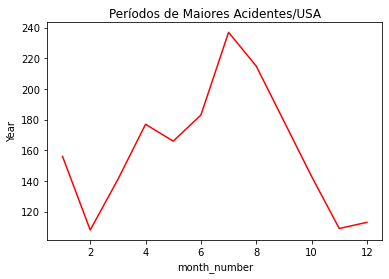

In [394]:
graf_USA = sns.lineplot(data = df_USA, x = 'month_number', y = "Year", color = 'Red')
graf_USA.set_title('Períodos de Maiores Acidentes/USA')